In [539]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sci
import time
#https://www.flower-db.com/en/search/seasons?q=april

Date of query

In [540]:
from datetime import date

In [541]:
today = date.today()
today

datetime.date(2023, 4, 26)

In [542]:
day = today.strftime("%d")
weekday = today.strftime("%A")
month = today.strftime("%B")
year = today.strftime("%Y")

In [543]:
month

'April'

In [544]:
day

'26'

Web scraping page corresponding to current month

In [545]:
from bs4 import BeautifulSoup
import requests

In [546]:
url = f"https://www.flower-db.com/en/search/seasons?q={month.lower()}&page={day}"

In [547]:
url

'https://www.flower-db.com/en/search/seasons?q=april&page=26'

In [548]:
page = requests.get(url).text

In [549]:
doc = BeautifulSoup(page,"html.parser")

In [550]:
doc.prettify()

'<!DOCTYPE html>\n<html class="h-100" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width,initial-scale=1" name="viewport"/>\n  <title>\n   Flowers bloom in April | Flower Database\n  </title>\n  <link href="https://www.flower-db.com/assets/180x180-b565022977809c0d0930d4bf7a8f370e4ff322827aa09d8d6995d5803ee44af4.png" rel="apple-touch-icon" type="image/png"/>\n  <link href="https://www.flower-db.com/assets/192x192-be279cb9985010e2d83e18225c9f5d3b2f8cb99e61f606ed9eecdf2a3d36ceb5.png" rel="icon" type="image/png"/>\n  <meta content="Includes birthday flowers, flower diaries, popular flower access rankings, and feature articles. More than 2,500 species in the flower gallery." name="description"/>\n  <link href="https://www.flower-db.com/en/search/seasons?q=april&amp;page=26" rel="canonical"/>\n  <link href="https://www.flower-db.com/ja/search/seasons" hreflang="ja" rel="alternate"/>\n  <link href="https://www.flower-db.com/en/search/seasons" hreflang="en" rel

In [551]:
page_text = doc.find(class_ = "card link-dark h-100")
page_text()

[<picture><source srcset="https://storage.googleapis.com/flower-db-prd/md_webp-5aa1ffef302cb9a01e9bf37f27a95138.webp" type="image/webp"/><source srcset="https://storage.googleapis.com/flower-db-prd/md-d43ee36096003ca5bd90d45e31cbe87b.jpeg" type="image/jpeg"/><img alt="Ivy geranium" class="card-img-top" loading="lazy" src="https://storage.googleapis.com/flower-db-prd/md-d43ee36096003ca5bd90d45e31cbe87b.jpeg"/></picture>,
 <source srcset="https://storage.googleapis.com/flower-db-prd/md_webp-5aa1ffef302cb9a01e9bf37f27a95138.webp" type="image/webp"/>,
 <source srcset="https://storage.googleapis.com/flower-db-prd/md-d43ee36096003ca5bd90d45e31cbe87b.jpeg" type="image/jpeg"/>,
 <img alt="Ivy geranium" class="card-img-top" loading="lazy" src="https://storage.googleapis.com/flower-db-prd/md-d43ee36096003ca5bd90d45e31cbe87b.jpeg"/>,
 <div class="card-body"><h2 class="fs-6 lh-sm mb-0 line-clamp-2">Ivy geranium</h2></div>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Ivy geranium</h2>]

In [552]:
page_text = doc.find_all("h2")
page_text

[<h2 class="fs-6 lh-sm mb-0 line-clamp-2">Ivy geranium</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Aucuba 'Sulphrea Marginata'</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Akabana rurihakobe,</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Anemone</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Pink Abelia </h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Lyacaste skinneri｜National Flower of the Republic of Guatemala</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Japanese Cheesewood</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Amesia</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Allamanda</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Yellow Sultan</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2"> cananga tree </h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Euphorbia jolkinii</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Polygonatum odoratum</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Succulent Sesame</h2>,
 <h2 class="fs-6 lh-sm mb-0 line-clamp-2">Garden pansy 'Morp

In [553]:
len(page_text)

18

In [554]:
import random

In [555]:
random_number = random.randrange(1,len(page_text))
random_number = int(day) % int(len(page_text))

In [556]:
random_number

8

In [557]:
species = page_text[random_number-1]

In [558]:
species

<h2 class="fs-6 lh-sm mb-0 line-clamp-2">Amesia</h2>

In [559]:
#cleantext = BeautifulSoup(page_text, "lxml").text

In [560]:
daily_flower = BeautifulSoup(str(page_text[random_number]), "lxml").text
daily_flower

'Allamanda'

In [561]:
page_text2 = doc.find(class_  = "card-body") # doc.find only shows the first one, use doc.find_all instead
page_text2

<div class="card-body"><h2 class="fs-6 lh-sm mb-0 line-clamp-2">Ivy geranium</h2></div>

In [562]:
page_text3 = doc.find_all("picture")
page_text3

[<picture><source srcset="https://storage.googleapis.com/flower-db-prd/md_webp-5aa1ffef302cb9a01e9bf37f27a95138.webp" type="image/webp"/><source srcset="https://storage.googleapis.com/flower-db-prd/md-d43ee36096003ca5bd90d45e31cbe87b.jpeg" type="image/jpeg"/><img alt="Ivy geranium" class="card-img-top" loading="lazy" src="https://storage.googleapis.com/flower-db-prd/md-d43ee36096003ca5bd90d45e31cbe87b.jpeg"/></picture>,
 <picture><source srcset="https://storage.googleapis.com/flower-db-prd/md_webp-95bdca7cb0f89e96606779dce3d4b7fb.webp" type="image/webp"/><source srcset="https://storage.googleapis.com/flower-db-prd/md-324fbe3198f6af7b3a910c43645ef5d5.jpeg" type="image/jpeg"/><img alt="Aucuba 'Sulphrea Marginata'" class="card-img-top" loading="lazy" src="https://storage.googleapis.com/flower-db-prd/md-324fbe3198f6af7b3a910c43645ef5d5.jpeg"/></picture>,
 <picture><source srcset="https://storage.googleapis.com/flower-db-prd/md_webp-ffdb283f0792c0f2e3f35c802689cab3.webp" type="image/webp"/>

In [563]:
p = doc.find_all("source")
p

[<source srcset="https://storage.googleapis.com/flower-db-prd/md_webp-5aa1ffef302cb9a01e9bf37f27a95138.webp" type="image/webp"/>,
 <source srcset="https://storage.googleapis.com/flower-db-prd/md-d43ee36096003ca5bd90d45e31cbe87b.jpeg" type="image/jpeg"/>,
 <source srcset="https://storage.googleapis.com/flower-db-prd/md_webp-95bdca7cb0f89e96606779dce3d4b7fb.webp" type="image/webp"/>,
 <source srcset="https://storage.googleapis.com/flower-db-prd/md-324fbe3198f6af7b3a910c43645ef5d5.jpeg" type="image/jpeg"/>,
 <source srcset="https://storage.googleapis.com/flower-db-prd/md_webp-ffdb283f0792c0f2e3f35c802689cab3.webp" type="image/webp"/>,
 <source srcset="https://storage.googleapis.com/flower-db-prd/md-751f840fb057b764c9b670fe1fa4d48e.jpeg" type="image/jpeg"/>,
 <source srcset="https://storage.googleapis.com/flower-db-prd/md_webp-d1205838dba2338eb670fabf1239d7e2.webp" type="image/webp"/>,
 <source srcset="https://storage.googleapis.com/flower-db-prd/md-a30301aaa67484978f9119085ad529e7.jpeg" t

In [564]:
cnt = -1;
for link in doc.find_all("source"):
    cnt = cnt+1
    print(link.get('srcset'))
    if cnt == 2*(random_number):
        daily_flower_url = link.get('srcset')

https://storage.googleapis.com/flower-db-prd/md_webp-5aa1ffef302cb9a01e9bf37f27a95138.webp
https://storage.googleapis.com/flower-db-prd/md-d43ee36096003ca5bd90d45e31cbe87b.jpeg
https://storage.googleapis.com/flower-db-prd/md_webp-95bdca7cb0f89e96606779dce3d4b7fb.webp
https://storage.googleapis.com/flower-db-prd/md-324fbe3198f6af7b3a910c43645ef5d5.jpeg
https://storage.googleapis.com/flower-db-prd/md_webp-ffdb283f0792c0f2e3f35c802689cab3.webp
https://storage.googleapis.com/flower-db-prd/md-751f840fb057b764c9b670fe1fa4d48e.jpeg
https://storage.googleapis.com/flower-db-prd/md_webp-d1205838dba2338eb670fabf1239d7e2.webp
https://storage.googleapis.com/flower-db-prd/md-a30301aaa67484978f9119085ad529e7.jpeg
https://storage.googleapis.com/flower-db-prd/md_webp-389756dc0c522c4298821304ed9cb8cb.webp
https://storage.googleapis.com/flower-db-prd/md-fef13613368f45f7afed6998d9a87e8d.jpeg
https://storage.googleapis.com/flower-db-prd/md_webp-7caa30fd092a416d88be596be9b4e3aa.webp
https://storage.googleap

In [565]:
page_text4 = doc.find_all(class_ = "col")
page_text4

[<div class="col"><input class="form-control form-control-lg" id="query" name="query" placeholder="Enter flower name" type="search"/></div>,
 <div class="col"><label class="form-label" for="name">Flower Name</label><input class="form-control" id="name" name="name" type="text"/></div>,
 <div class="col"><label class="form-label" for="formal_name">Scientific Name</label><input class="form-control" id="formal_name" name="formal_name" type="text"/></div>,
 <div class="col"><label class="form-label" for="origin">Place of origin</label><input class="form-control" id="origin" name="origin" type="text"/></div>,
 <div class="col"><label class="form-label" for="morph">Living type</label><input class="form-control" id="morph" name="morph" type="text"/></div>,
 <div class="col"><label class="form-label" for="order">Order</label><input class="form-control" id="order" name="order" type="text"/></div>,
 <div class="col"><label class="form-label" for="family">Family</label><input class="form-control" 

In [566]:
for l0 in doc.find_all(class_ = "col"):
        print(l0.get('source'))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [567]:
# To be continued

Displaying image of the day

In [568]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(daily_flower_url)
img = Image.open(BytesIO(response.content))

Today is Wednesday 26 April 2023.
Image of the day : Allamanda. Here's a sneak peak : 


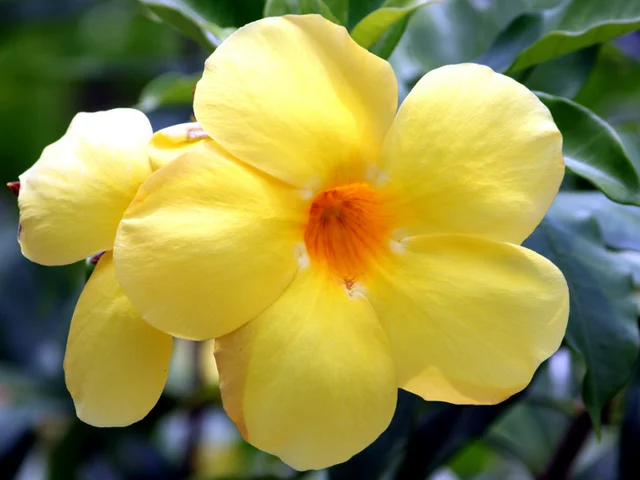

In [569]:
print(f"Today is {weekday} {day} {month} {year}.")
print(f"Image of the day : {daily_flower}. Here's a sneak peak : ")
display(img)

In [570]:
random_number

8

In [571]:
response

<Response [200]>

In [572]:
url

'https://www.flower-db.com/en/search/seasons?q=april&page=26'